In [1]:
##!pip install imblearn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housingData = pd.read_csv("Melbourne_housing_FULL.csv")

In [4]:
housing_data = pd.DataFrame(housingData, columns=['Suburb',"Rooms","Type","Distance","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Regionname","Price"])

In [5]:
housing_data = housing_data[housing_data['Price'].notna()]

In [6]:
housing_data.to_csv(r'/Users/zhouxinrong/Desktop/UACMPUT/CMPUT466/CMPUT466-Project/housing_data.csv')

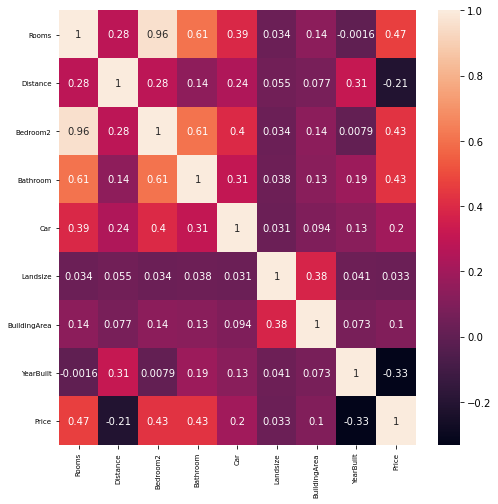

In [7]:
corr = housing_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=7)
plt.xticks(rotation=90, size=7)
plt.show()

In [8]:
percent_missing = housing_data.isnull().sum() * 100 / len(housing_data)
missing_value_df = pd.DataFrame({'column_name': housing_data.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

               column_name  percent_missing
Suburb              Suburb         0.000000
Rooms                Rooms         0.000000
Type                  Type         0.000000
Distance          Distance         0.003670
Bedroom2          Bedroom2        23.639300
Bathroom          Bathroom        23.661321
Car                    Car        25.044959
Landsize          Landsize        34.003744
BuildingArea  BuildingArea        60.891107
YearBuilt        YearBuilt        55.650163
Regionname      Regionname         0.011010
Price                Price         0.000000


In [109]:
from collections import Counter
size = housing_data.groupby(['Suburb']).size()
print(housing_data.groupby(['Suburb']).size())

Suburb
Abbotsford      102
Aberfeldie       70
Airport West    151
Albanvale         9
Albert Park      93
               ... 
Yallambie        45
Yarra Glen        1
Yarraville      250
croydon           1
viewbank          1
Length: 345, dtype: int64


In [112]:
size.sort_values(inplace = True,ascending=False)

In [113]:
size

Suburb
Reservoir         727
Bentleigh East    493
Richmond          439
Preston           415
Brunswick         387
                 ... 
Wildwood            1
Yarra Glen          1
Montrose            1
Botanic Ridge       1
viewbank            1
Length: 345, dtype: int64

In [28]:
X = housing_data.drop(["Price"], axis=1)
y = housing_data["Price"]

In [21]:

# Get one hot encoding of columns B
one_hot_type = pd.get_dummies(X['Type'])
# Drop column B as it is now encoded
newX = X.drop('Type',axis = 1)
# Join the encoded df
newX = newX.join(one_hot_type)


# Get one hot encoding of columns B
one_hot_regionname = pd.get_dummies(X['Regionname'])
# Drop column B as it is now encoded
newX = newX.drop('Regionname',axis = 1)
# Join the encoded df
newX = newX.join(one_hot_regionname)

In [22]:
newX = newX.drop('Suburb',axis =1)

In [23]:
newX = np.nan_to_num(newX)

In [24]:
newX

array([[2. , 2.5, 2. , ..., 0. , 0. , 0. ],
       [2. , 2.5, 2. , ..., 0. , 0. , 0. ],
       [3. , 2.5, 3. , ..., 0. , 0. , 0. ],
       ...,
       [2. , 6.3, 2. , ..., 0. , 1. , 0. ],
       [3. , 6.3, 0. , ..., 0. , 1. , 0. ],
       [2. , 6.3, 2. , ..., 0. , 1. , 0. ]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.20,random_state = 0)

In [13]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regressor.get_params())




Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [14]:
#  We will try adjusting the following set of hyperparameters:
# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

In [15]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', 0.4, 0.5, 0.6]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 50, stop = 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)





{'bootstrap': [True, False],
 'max_depth': [50, 62, 75, 87, 100, None],
 'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 325, 550, 775, 1000]}


In [51]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 14.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [18]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [19]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [26]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    print("    MAE", mean_absolute_error(test_labels, predictions))
    print("    RMSE", sqrt(mean_squared_error(test_labels, predictions)))
    print("    R2", r2_score(test_labels, predictions))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


Model Performance
Average Error: 192454.0828 degrees.
Accuracy = 82.37%.
    MAE 192454.08278981468
    RMSE 336748.3684653763
    R2 0.7340694679836208


In [41]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 184310.4242 degrees.
Accuracy = 83.09%.
    MAE 184310.42420239982
    RMSE 328759.0531165666
    R2 0.7465381247094739


In [42]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.88%.


In [43]:
base_model = RandomForestRegressor(n_estimators = 300, random_state = 0)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 185351.8846 degrees.
Accuracy = 83.03%.
    MAE 185351.88457849843
    RMSE 328113.91243683116
    R2 0.7475319110374631


In [30]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60,70,80,90],
    'max_features': ['sqrt', 'log2','10'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400]
}
# Create a based model
regressor = RandomForestRegressor()
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid,
                          cv = 2, n_jobs = -1, verbose = 2)

In [31]:
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  4.1min finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [60, 70, 80, 90],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [35]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [114]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)


Model Performance
Average Error: 158803.6327 degrees.
Accuracy = 84.69%.
    MAE 158803.6327342085
    RMSE 272331.6162290565
    R2 0.8181009321520925


In [37]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Improvement of -1.19%.
